In [113]:
import pandas as pd
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
# Load the dataframe for all rides
full_df = pd.read_csv(r"c:\Users\janin\OneDrive\Desktop\Python exercise\Project 3\CBS_2021-2023_Full.csv")

C:\Users\janin\AppData\Local\Temp\ipykernel_20280\1907177609.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  full_df = pd.read_csv(r"c:\Users\janin\OneDrive\Desktop\Python exercise\Project 3\CBS_2021-2023_Full.csv")


Cleaning full_df

In [121]:
full_df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.89460,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.96000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.92087,-77.031691,member


In [122]:
full_df.shape

(10693997, 13)

In [123]:
# Display the number of NaN values in each column
nan_values = full_df.isna().sum()
print("NaN values per column:\n", nan_values)


NaN values per column:
 ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64


In [124]:
# Remove rows with any NaN values
full_df_cleaned = full_df.dropna()

In [125]:
# Display the number of NaN values in each column
nan_values = full_df_cleaned.isna().sum()
print("NaN values per column:\n", nan_values)

NaN values per column:
 ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64


In [126]:
# Convert 'started_at' and 'ended_at' columns to datetime
full_df_cleaned['started_at'] = pd.to_datetime(full_df_cleaned['started_at'], errors='coerce')
full_df_cleaned['ended_at'] = pd.to_datetime(full_df_cleaned['ended_at'], errors='coerce')

# Check the types of the columns to ensure conversion was successful
print(full_df_cleaned.dtypes)


C:\Users\janin\AppData\Local\Temp\ipykernel_20280\269346702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df_cleaned['started_at'] = pd.to_datetime(full_df_cleaned['started_at'], errors='coerce')


ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object


C:\Users\janin\AppData\Local\Temp\ipykernel_20280\269346702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df_cleaned['ended_at'] = pd.to_datetime(full_df_cleaned['ended_at'], errors='coerce')


In [127]:
# Create the 'day_type' column based on weekday
full_df_cleaned['day_type'] = full_df_cleaned['started_at'].dt.weekday.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Check the result
print(full_df_cleaned[['started_at', 'day_type']].head())


           started_at day_type
0 2021-01-01 00:08:33  Weekday
2 2021-01-01 00:14:32  Weekday
3 2021-01-01 00:15:45  Weekday
4 2021-01-01 00:17:46  Weekday
6 2021-01-01 00:19:06  Weekday


C:\Users\janin\AppData\Local\Temp\ipykernel_20280\228696278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df_cleaned['day_type'] = full_df_cleaned['started_at'].dt.weekday.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')


In [128]:
# Calculate the duration in seconds
full_df_cleaned['duration'] = (full_df_cleaned['ended_at'] - full_df_cleaned['started_at']).dt.total_seconds()

# Filter rides where the duration is between 60 seconds (1 minute) and 14400 seconds (4 hours)
df_filtered = full_df_cleaned[(full_df_cleaned['duration'] >= 60) & (full_df_cleaned['duration'] <= 14400)]

# Check the result
df_filtered[['ride_id', 'duration']].head()



C:\Users\janin\AppData\Local\Temp\ipykernel_20280\1423673658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df_cleaned['duration'] = (full_df_cleaned['ended_at'] - full_df_cleaned['started_at']).dt.total_seconds()


,ride_id,duration
0,5CB9DFCECF79AF84,1520.0
2,E74069873161EE33,853.0
3,91F95E512CABC46A,335.0
4,DA46A05139C0EA2F,194.0
6,0535306B61EF92F9,1042.0


In [130]:
# Create season column using vectorized operations
df_filtered['season'] = np.select(
    [
        (df_filtered['started_at'] >= pd.to_datetime(df_filtered['started_at'].dt.year.astype(str) + '-03-20')) & 
         (df_filtered['started_at'] < pd.to_datetime(df_filtered['started_at'].dt.year.astype(str) + '-06-21')),
        
        (df_filtered['started_at'] >= pd.to_datetime(df_filtered['started_at'].dt.year.astype(str) + '-06-21')) & 
         (df_filtered['started_at'] < pd.to_datetime(df_filtered['started_at'].dt.year.astype(str) + '-09-23')),

        (df_filtered['started_at'] >= pd.to_datetime(df_filtered['started_at'].dt.year.astype(str) + '-09-23')) & 
         (df_filtered['started_at'] < pd.to_datetime(df_filtered['started_at'].dt.year.astype(str) + '-12-21'))
    ],
    ['Spring', 'Summer', 'Fall'],
    default='Winter'
)

df_filtered['year'] = df_filtered['started_at'].dt.year

# Select the desired columns
bike_data_new = df_filtered[['ride_id', 'started_at', 'ended_at', 'year', 'season', 'day_type', 'start_station_name', 
                                 'start_station_id', 'start_lat', 'start_lng', 
                                 'end_station_name', 'end_station_id', 'end_lat', 
                                 'end_lng', 'member_casual', 'rideable_type']]

# Display the final DataFrame
bike_data_new.head()


C:\Users\janin\AppData\Local\Temp\ipykernel_20280\2308558024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['season'] = np.select(
C:\Users\janin\AppData\Local\Temp\ipykernel_20280\2308558024.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['started_at'].dt.year


,ride_id,started_at,ended_at,year,season,day_type,start_station_name,start_station_id,start_lat,start_lng,end_station_name,end_station_id,end_lat,end_lng,member_casual,rideable_type
0,5CB9DFCECF79AF84,2021-01-01 00:08:33,2021-01-01 00:33:53,2021,Winter,Weekday,Maine Ave & 9th St SW,31646.0,38.880440,-77.025236,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.894600,-77.072305,member,classic_bike
2,E74069873161EE33,2021-01-01 00:14:32,2021-01-01 00:28:45,2021,Winter,Weekday,17th & Corcoran St NW,31214.0,38.912138,-77.038568,14th & Belmont St NW,31119.0,38.920870,-77.031691,member,electric_bike
3,91F95E512CABC46A,2021-01-01 00:15:45,2021-01-01 00:21:20,2021,Winter,Weekday,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,member,classic_bike
4,DA46A05139C0EA2F,2021-01-01 00:17:46,2021-01-01 00:21:00,2021,Winter,Weekday,11th & Park Rd NW,31651.0,38.931322,-77.028247,14th & Newton St NW,31649.0,38.931991,-77.032956,member,classic_bike
6,0535306B61EF92F9,2021-01-01 00:19:06,2021-01-01 00:36:28,2021,Winter,Weekday,Bladensburg Rd & Benning Rd NE,31617.0,38.900413,-76.982872,Good Hope Rd & MLK Ave SE,31802.0,38.867373,-76.988039,casual,classic_bike


### BASIC EDA

C:\Users\janin\AppData\Local\Temp\ipykernel_20280\445387344.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data_new['started_at'] = pd.to_datetime(bike_data_new['started_at'])
C:\Users\janin\AppData\Local\Temp\ipykernel_20280\445387344.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data_new['year'] = bike_data_new['started_at'].dt.year


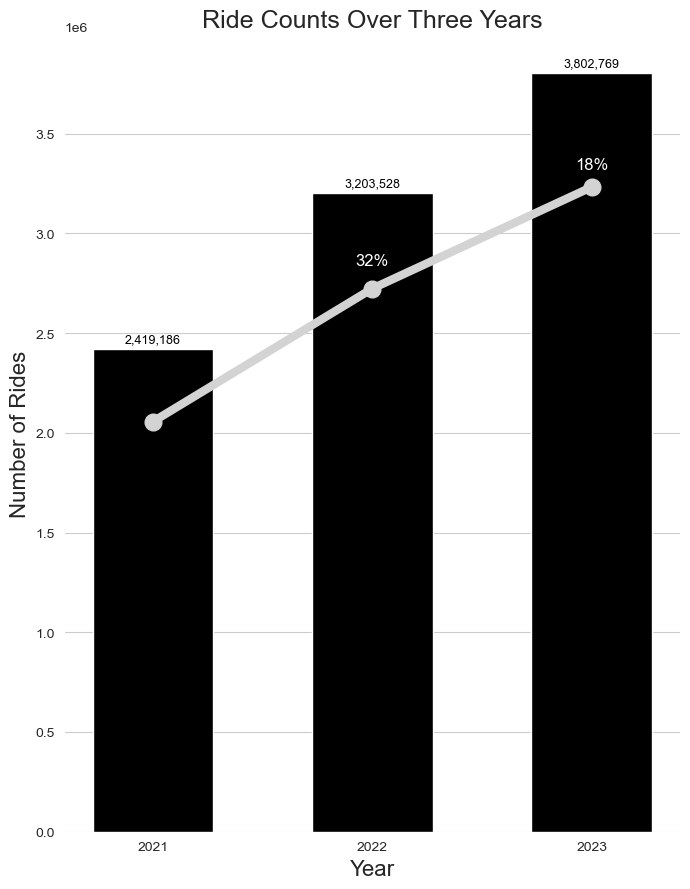

In [ ]:
# Set the style for the plots
sns.set_style("whitegrid")

# Assuming full_df is your DataFrame
# Convert 'started_at' to datetime if it is not already
bike_data_new['started_at'] = pd.to_datetime(bike_data_new['started_at'])

# Extract year from the 'started_at' column
bike_data_new['year'] = bike_data_new['started_at'].dt.year


# Count the number of rides per year for members
rides_per_year = bike_data_new['year'].value_counts().sort_index()

# Create a DataFrame for plotting
rides_df = pd.DataFrame({
    'Year': rides_per_year.index,
    'Sample Size': rides_per_year.values
})

# Calculate percentage increase (ignore NaN for the first year)
rides_df['Percentage Increase'] = rides_df['Sample Size'].pct_change() * 100

# Create the bar plot with adjusted bar width
plt.figure(figsize=(7, 9))
bar_width = 0.55  # Adjust this value for the bar width
bar_positions = rides_df['Year']  # Use the original year positions

# Create the bars
bars = plt.bar(bar_positions, rides_df['Sample Size'], width=bar_width, color='black', align='center')

# Add a trendline below the bars with increased dot size
plt.plot(bar_positions, rides_df['Sample Size'] * 0.85, '-o', color='lightgrey', linewidth=6, markersize=12)  # Adjust height for trendline and dot size

# Add value counts above each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,}',  # Format with commas
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 textcoords="offset points",
                 xytext=(0, 5),  # Position above the bar
                 ha='center', fontsize=9, color='black')

# Annotate the percentage increases on the trendline, excluding NaN values
for i in range(1, len(rides_df)):
    if not pd.isna(rides_df['Percentage Increase'].iloc[i]):
        plt.annotate(f'{int(rides_df["Percentage Increase"].iloc[i])}%',  # No decimals
                     (bar_positions.iloc[i], rides_df['Sample Size'].iloc[i] * 0.80),  # Adjust height for the trendline
                     textcoords="offset points", 
                     xytext=(0, 40),  # Slightly higher position
                     ha='center', fontsize=12, color='white')

# Add title and labels
plt.title('Ride Counts Over Three Years', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Rides', fontsize=16)

# Disable vertical grid lines
plt.grid(axis='x')  # Keep horizontal grid lines only

# Set x-ticks to show full year values without decimals
plt.xticks(rides_df['Year'].astype(int))  # Ensure years are integers

# Remove outer borders at the top and right
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


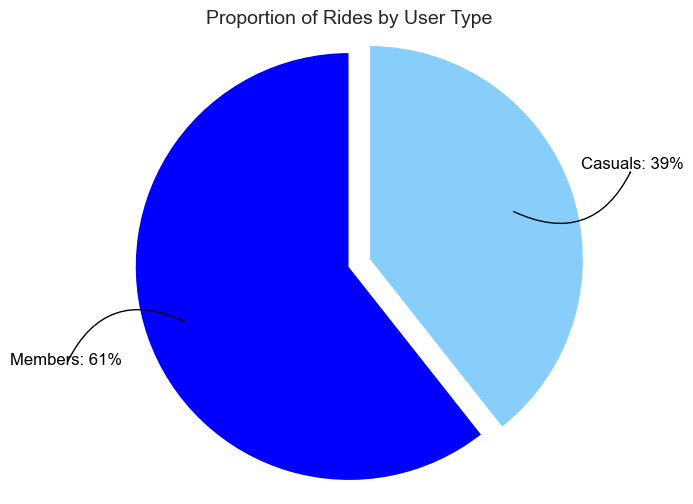

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import FancyArrowPatch

# Assuming bike_data_new is your DataFrame
# Count the number of rides by user type, ignoring NaN values
user_type_counts = bike_data_new['member_casual'].value_counts(dropna=True)

# Define labels based on the index
labels = ['Members' if i == 'member' else 'Casuals' for i in user_type_counts.index]
colors = ['blue', 'lightskyblue']  # Adjust colors as desired

# Explode the "Casual" slice (index 0 for casuals)
explode = (0, 0.1)  # No explosion for Members, slight explosion for Casuals

# Create the pie chart with black edges
plt.figure(figsize=(8, 6))
wedges, _ = plt.pie(
    user_type_counts,
    startangle=90,
    colors=colors,
    labels=None,  # Don't show labels on the pie chart itself
    explode=explode  # Explode the Casuals slice
)

# Calculate percentages and round them
percentages = (user_type_counts / user_type_counts.sum() * 100).round(0)

# Ensure we have the correct number of labels and percentages
for i in range(len(wedges)):
    angle = (wedges[i].theta2 + wedges[i].theta1) / 2
    # Increase the multiplier for more distance from the pie chart
    x = wedges[i].r * 1.4 * np.cos(np.deg2rad(angle))
    y = wedges[i].r * 1.4 * np.sin(np.deg2rad(angle))
    
    # Use the i-th index safely
    if i < len(labels) and i < len(percentages):
        # Create text label
        label = f'{labels[i]}: {int(percentages.iloc[i])}%'
        plt.text(x, y, label, color='black', fontsize=12, ha='center')

        # Draw an arrow from the pie chart to the label
        arrow = FancyArrowPatch((wedges[i].r * 0.8 * np.cos(np.deg2rad(angle)),
                                  wedges[i].r * 0.8 * np.sin(np.deg2rad(angle))),
                                 (x, y),
                                 connectionstyle="arc3,rad=.5",
                                 color='black',
                                 arrowstyle='->', lw=1)
        plt.gca().add_patch(arrow)

# Increase title size
plt.title('Proportion of Rides by User Type', fontsize=14)  # Adjust fontsize as needed
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()


C:\Users\janin\AppData\Local\Temp\ipykernel_20280\2028116158.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data_new['started_at'] = pd.to_datetime(bike_data_new['started_at'])


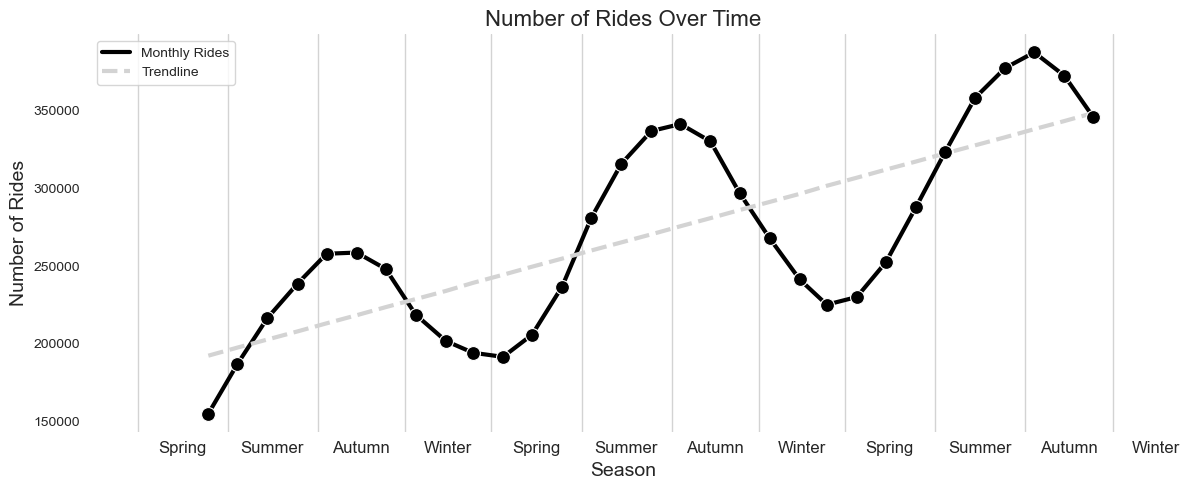

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# Set the style for the plots
sns.set_style("whitegrid")  # Whitegrid style for lighter background but no horizontal gridlines

# Set global font size parameters
plt.rcParams.update({
    'font.size': 10,  # Default font size for most elements
    'axes.titlesize': 14,  # Title font size
    'axes.labelsize': 12,  # Axis labels font size
    'xtick.labelsize': 10,  # X-axis ticks font size
    'ytick.labelsize': 10,  # Y-axis ticks font size
    'legend.fontsize': 10,  # Legend font size
})

# Make sure the 'started_at' column is in datetime format
bike_data_new['started_at'] = pd.to_datetime(bike_data_new['started_at'])

# Extract the month and year from the 'started_at' column to group by month
bike_data_new['month'] = bike_data_new['started_at'].dt.to_period('M')

# Group by month to count monthly rides
monthly_rides = bike_data_new.groupby('month').size()

# Apply a rolling average to reduce noise (e.g., a 6-month rolling window for smoothing)
monthly_rides_smoothed = monthly_rides.rolling(window=6).mean()

# Drop NaN values from the smoothed series
monthly_rides_smoothed = monthly_rides_smoothed.dropna()

# Prepare data for linear regression
X = np.array(range(len(monthly_rides_smoothed))).reshape(-1, 1)  # Time index as independent variable
y = monthly_rides_smoothed.values  # Smoothed rides as dependent variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)
trendline = model.predict(X)

# Convert the period index to datetime for better plotting
monthly_rides_smoothed.index = monthly_rides_smoothed.index.to_timestamp()

# Create the plot
plt.figure(figsize=(12, 5))

# Plot the main line using Seaborn's lineplot for smoothed data
sns.lineplot(x=monthly_rides_smoothed.index, y=monthly_rides_smoothed, color='black', label='Monthly Rides', linewidth=3)

# Plot the trendline using Seaborn's lineplot
sns.lineplot(x=monthly_rides_smoothed.index, y=trendline, color='lightgrey', linestyle='--', 
             label='Trendline', linewidth=3)

# Add round markers at each data point on the line, but don't add them to the legend
sns.scatterplot(x=monthly_rides_smoothed.index, y=monthly_rides_smoothed, color='black', 
                marker='o', s=100, zorder=3, legend=False)  # legend=False hides the markers in the legend

# Title and labels with adjustable font sizes
plt.title('Number of Rides Over Time', fontsize=16)  # Title font size
plt.xlabel('Season', fontsize=14)  # X-axis label font size
plt.ylabel('Number of Rides', fontsize=14)  # Y-axis label font size

# Set tick marks for the start of each season for multiple years
years = monthly_rides.index.year.unique()

season_starts = []
season_ends = []
season_labels = []

# Create season start and end dates for each year, with unique labels
for year in years:
    # Define the start and end of each season
    spring_start = pd.to_datetime(f'{year}-03-20')
    summer_start = pd.to_datetime(f'{year}-06-21')
    autumn_start = pd.to_datetime(f'{year}-09-22')
    winter_start = pd.to_datetime(f'{year}-12-21')
    
    # Season end dates
    spring_end = pd.to_datetime(f'{year}-06-20')
    summer_end = pd.to_datetime(f'{year}-09-21')
    autumn_end = pd.to_datetime(f'{year}-12-20')
    winter_end = pd.to_datetime(f'{year+1}-03-19')  # Winter ends in the next year

    # Append the start and end dates of each season
    season_starts.extend([spring_start, summer_start, autumn_start, winter_start])
    season_ends.extend([spring_end, summer_end, autumn_end, winter_end])
    
    # Assign season names
    season_labels.extend(['Spring', 'Summer', 'Autumn', 'Winter'])

# Add **only vertical gridlines** to mark the beginning and end of each season
for start in season_starts:
    plt.axvline(x=start, color='lightgrey', linestyle='-', linewidth=1, zorder=0)  # Make sure the gridline is behind the plot

# Remove **both vertical and horizontal gridlines** by disabling all gridlines
plt.grid(False)  # Disable all gridlines

# Remove outer borders at the top, right, bottom, and left
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Set **xticks** only in between the seasons to avoid duplicates
# Only select the midpoints of the seasons for xticks
midpoints = [start + (end - start) / 2 for start, end in zip(season_starts, season_ends)]
plt.xticks(midpoints, season_labels, ha='center', fontsize=12)  # Set font size for x-tick labels

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\janin\AppData\Local\Temp\ipykernel_20280\1913272994.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_type_counts = bike_data_new.groupby(['month', 'member_casual']).size().reset_index(name='count')


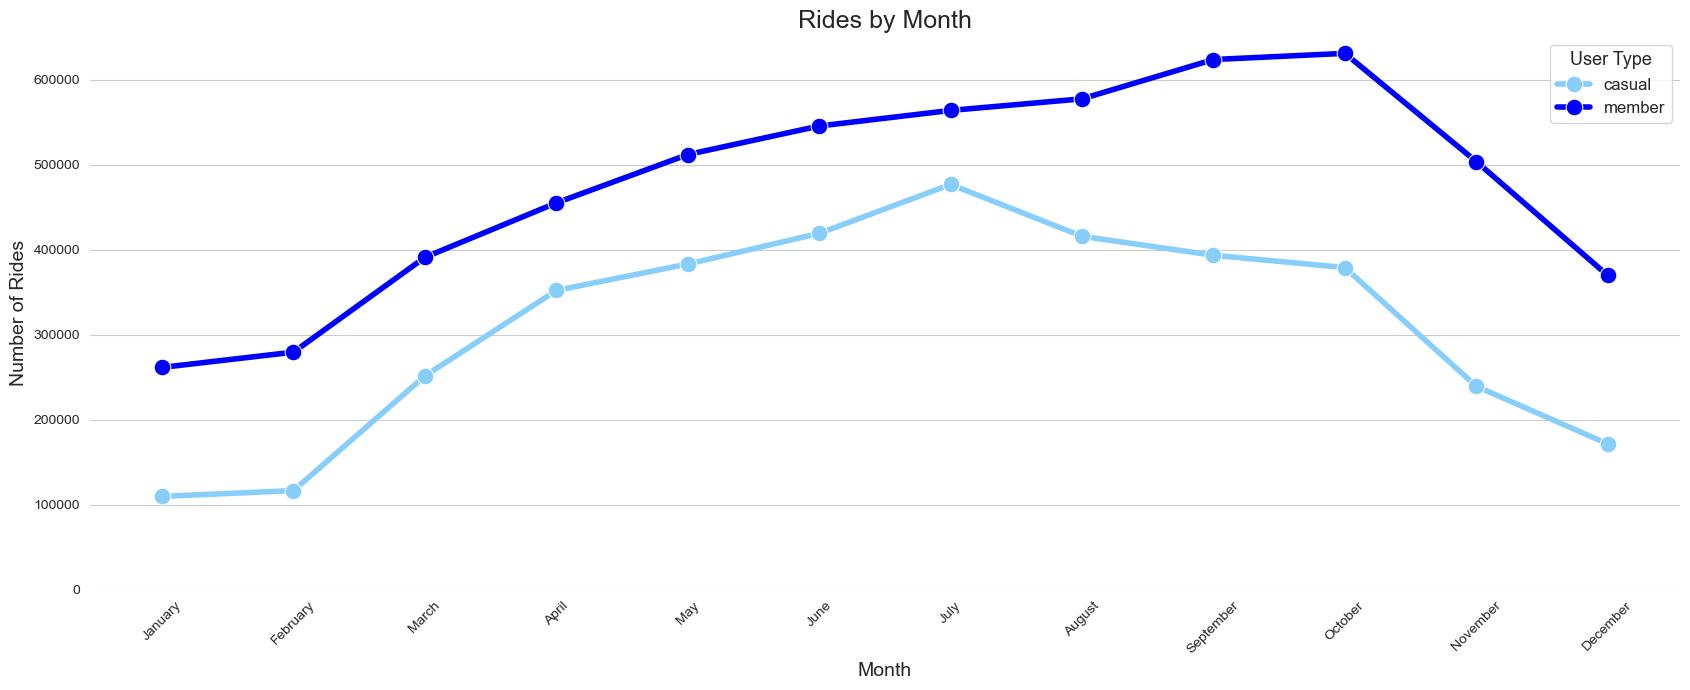

In [35]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

# Set the style for the plots
sns.set_style("whitegrid")

# Ensure that 'started_at' is in datetime format
bike_data_new['started_at'] = pd.to_datetime(bike_data_new['started_at'])

# Extract the month from 'started_at'
bike_data_new['month'] = bike_data_new['started_at'].dt.month_name()

# Ensure the 'month' column is in the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
bike_data_new['month'] = pd.Categorical(bike_data_new['month'], categories=month_order, ordered=True)

# Aggregate data by month and user type
user_type_counts = bike_data_new.groupby(['month', 'member_casual']).size().reset_index(name='count')

# Create the plot
plt.figure(figsize=(17, 7))

# Plot user type rides with hue for 'member1_casual2' and set custom colors
sns.lineplot(data=user_type_counts, x='month', y='count', hue='member_casual', 
             linewidth=4, marker='o', markersize=12, 
             palette={'member': 'blue', 'casual': 'lightskyblue'})  # Set custom colors for Member and Casual

# Set title and legend
plt.title("Rides by Month", fontsize=18)
plt.legend(title='User Type', loc='upper right', fontsize=12, title_fontsize='13')

# Remove top and right spines
sns.despine()

# Set y-axis to start at 0 and adjust upper limit to avoid cut-off
plt.ylim(0, user_type_counts['count'].max() + 20000)  # Increase y-axis upper limit to avoid cut-off

# Adjust y-axis and x-axis label font size
plt.ylabel('Number of Rides', fontsize=14)
plt.xlabel('Month', fontsize=14)

# Remove outer borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Set custom x-ticks for the months
plt.xticks(rotation=45)

# Disable vertical grid lines
plt.grid(axis='x')

# Show the plot
plt.tight_layout()
plt.show()


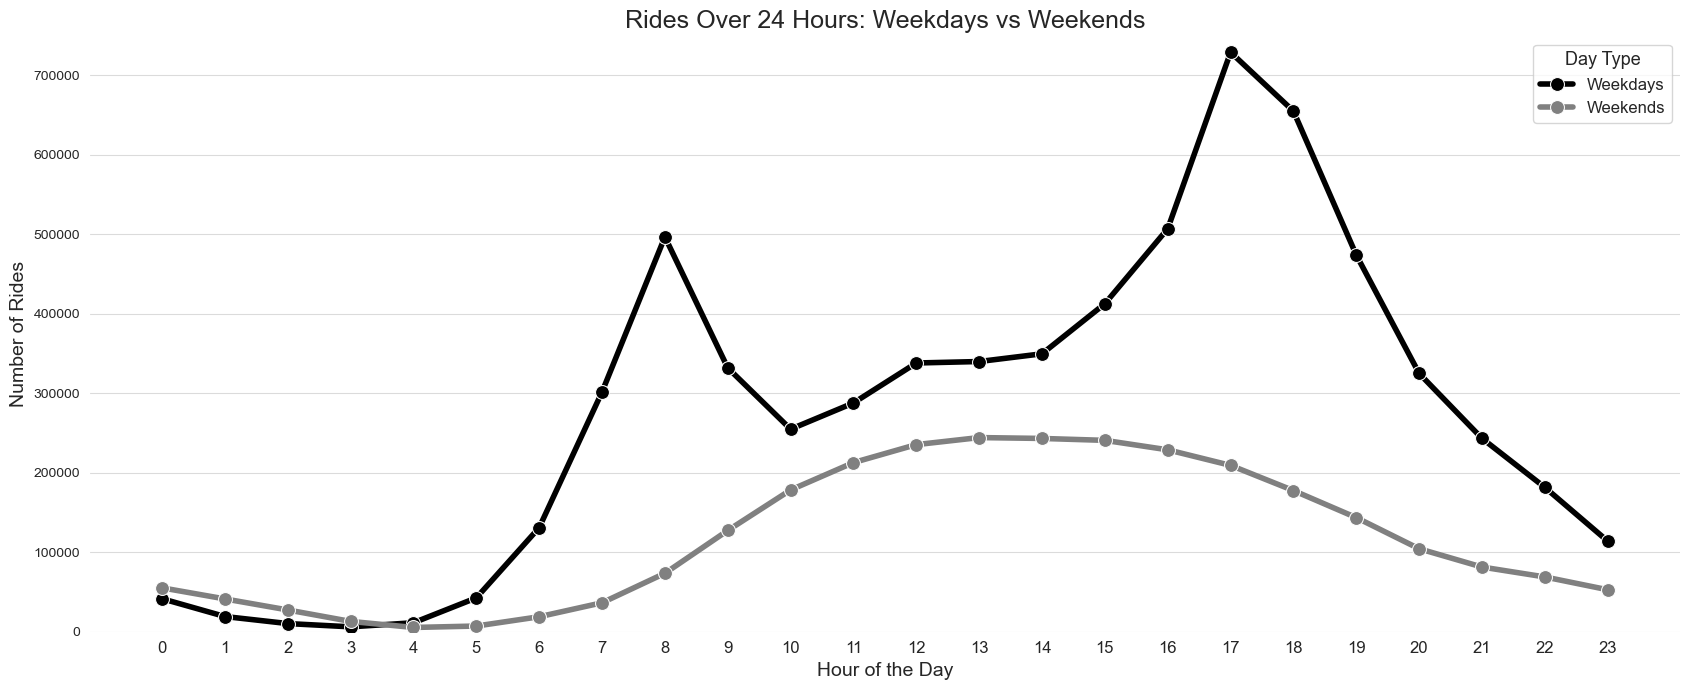

In [37]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

# Set the style for the plots
sns.set_style("whitegrid")

# Ensure that 'started_at' is in datetime format
bike_data_new['started_at'] = pd.to_datetime(bike_data_new['started_at'])

# Extract the hour of the day from 'started_at'
bike_data_new['hour'] = bike_data_new['started_at'].dt.hour

# Group by hour and day_type (Weekday/Weekend)
hourly_counts = bike_data_new.groupby(['hour', 'day_type']).size().reset_index(name='count')

# Create the plot
plt.figure(figsize=(17, 7))

# Plot the lineplot for weekdays and weekends, setting custom colors
sns.lineplot(data=hourly_counts[hourly_counts['day_type'] == 'Weekday'], 
             x='hour', y='count', linewidth=4, marker='o', markersize=10, 
             color='black', label='Weekdays')

sns.lineplot(data=hourly_counts[hourly_counts['day_type'] == 'Weekend'], 
             x='hour', y='count', linewidth=4, marker='o', markersize=10, 
             color='grey', label='Weekends')

# Set title and labels
plt.title("Rides Over 24 Hours: Weekdays vs Weekends", fontsize=18)
plt.ylabel('Number of Rides', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=14)

# Increase the y-axis range to avoid cut-off
plt.ylim(0, hourly_counts['count'].max() + 20000)  # Adjust the upper limit if necessary

# Remove top and right spines
sns.despine()

# Remove outer borders at the top, right, bottom, and left
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Adjust x-ticks to show all hours from 0 to 23
plt.xticks(range(24), fontsize=12)

# Disable vertical gridlines and add only horizontal gridlines
plt.grid(False)  # Turn off all gridlines initially
plt.gca().yaxis.grid(True, alpha=0.7)  # Only horizontal gridlines

# Set legend
plt.legend(title='Day Type', loc='upper right', fontsize=12, title_fontsize='13')

# Tighten layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()



C:\Users\janin\AppData\Local\Temp\ipykernel_20280\3606232431.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  members_data['ride_duration'] = (members_data['ended_at'] - members_data['started_at']).dt.total_seconds() / 60
C:\Users\janin\AppData\Local\Temp\ipykernel_20280\3606232431.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casual_data['ride_duration'] = (casual_data['ended_at'] - casual_data['started_at']).dt.total_seconds() / 60


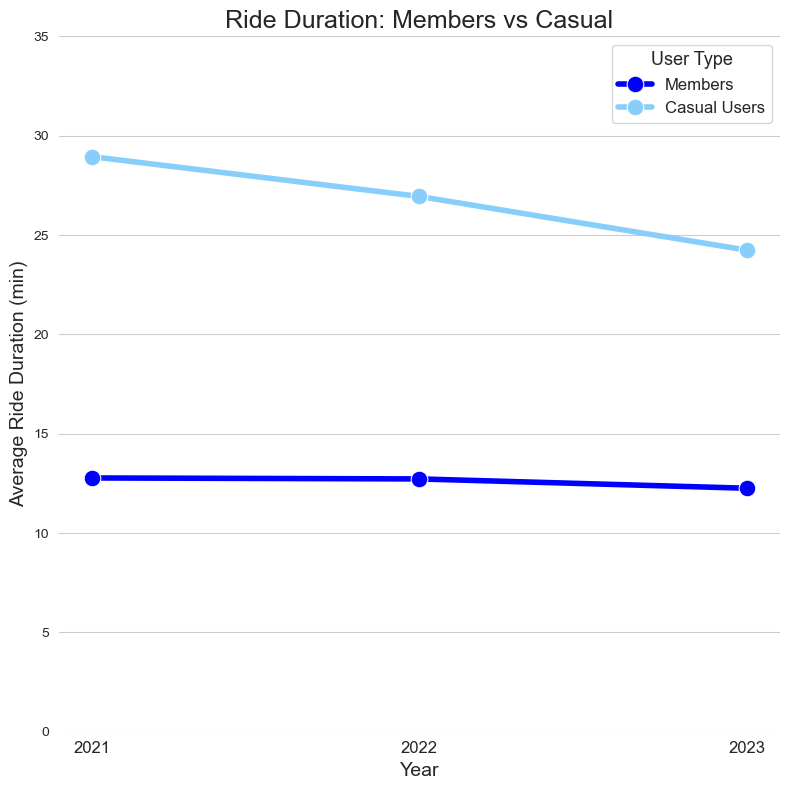

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the style for the plots
sns.set_style("whitegrid")

# Convert 'started_at' to datetime if not already
bike_data_new['started_at'] = pd.to_datetime(bike_data_new['started_at'])
bike_data_new['ended_at'] = pd.to_datetime(bike_data_new['ended_at'])

# Filter for members and casual users (1 = Member, 2 = Casual)
members_data = bike_data_new[bike_data_new['member_casual'] == 'member']
casual_data = bike_data_new[bike_data_new['member_casual'] == 'casual']

# Calculate ride duration (in minutes) for both members and casual users
members_data['ride_duration'] = (members_data['ended_at'] - members_data['started_at']).dt.total_seconds() / 60
casual_data['ride_duration'] = (casual_data['ended_at'] - casual_data['started_at']).dt.total_seconds() / 60

# Remove any rides with durations outside of the desired range (1 min to 4 hours)
members_data = members_data[(members_data['ride_duration'] >= 1) & (members_data['ride_duration'] <= 240)]
casual_data = casual_data[(casual_data['ride_duration'] >= 1) & (casual_data['ride_duration'] <= 240)]

# Remove any negative ride durations (if any)
members_data = members_data[members_data['ride_duration'] >= 0]
casual_data = casual_data[casual_data['ride_duration'] >= 0]

# Extract year from 'started_at' and create a new column 'year'
members_data['year'] = members_data['started_at'].dt.year
casual_data['year'] = casual_data['started_at'].dt.year

# Group by 'year' and calculate average ride duration for members
average_duration_member = members_data.groupby('year')['ride_duration'].mean().reset_index()

# Group by 'year' and calculate average ride duration for casual users
average_duration_casual = casual_data.groupby('year')['ride_duration'].mean().reset_index()

# Create the figure
plt.figure(figsize=(8, 8))

# Plot data for members
sns.lineplot(data=average_duration_member, x='year', y='ride_duration', linewidth=4, color='blue', marker='o', markersize=12, label='Members')

# Plot data for casual users
sns.lineplot(data=average_duration_casual, x='year', y='ride_duration', linewidth=4, color='lightskyblue', marker='o', markersize=12, label='Casual Users')

# Set title and legend
plt.title("Ride Duration: Members vs Casual", fontsize=18)
plt.legend(title='User Type', loc='upper right', fontsize=12, title_fontsize=13)

# Remove top and right spines
sns.despine()

# Adjust y-axis limits based on the range of average durations
plt.ylim(0, 35)

# Adjust y-axis label font size
plt.ylabel('Average Ride Duration (min)', fontsize=14)

# Adjust x-axis label font size
plt.xlabel('Year', fontsize=14)

# Set x-ticks to display full years
plt.xticks([2021, 2022, 2023], rotation=0, fontsize=12)  # Set x-tick labels to 2021, 2022, 2023

# Remove outer borders at the top and right
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Disable vertical grid lines
plt.grid(axis='x')  # Keep horizontal grid lines only

# Show the plot
plt.tight_layout()
plt.show()



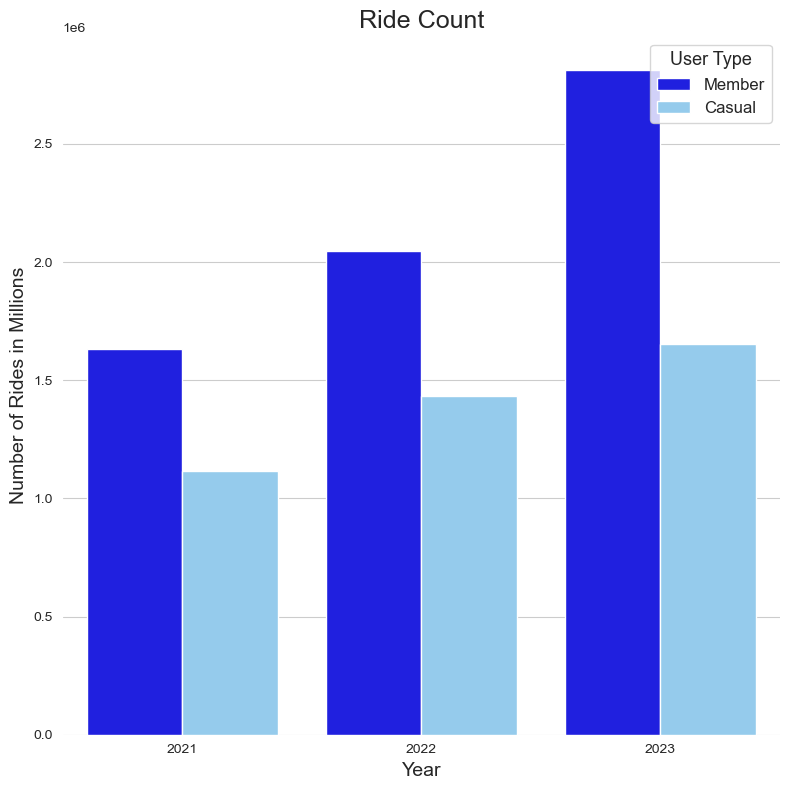

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), sharey=True, sharex=True)

# Countplot for user types by year
sns.countplot(data=full_df, x='year', hue='member_casual', order=[2021, 2022, 2023], 
               palette={'member': 'blue', 'casual': 'lightskyblue'})

# Set title and adjust font size
plt.title("Ride Count", fontsize=18)  # Adjust title font size
plt.xlabel("Year", fontsize=14)  # Adjust x-axis label font size
plt.ylabel("Number of Rides in Millions", fontsize=14)  # Adjust y-axis label font size

# Update legend with custom labels
plt.legend(title='User Type', labels=['Member', 'Casual'], fontsize=12, title_fontsize='13', loc='upper right')

# Remove outer borders at the top and right
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

plt.show()

### EDA Ward 7 & 8

In [48]:
bike_21_cleaned = pd.read_csv(r"C:\Users\janin\Documents\bike_21.csv")
bike_22_cleaned = pd.read_csv(r"C:\Users\janin\Documents\bike_22.csv")
bike_23_cleaned = pd.read_csv(r"C:\Users\janin\Documents\bike_23.csv")

In [55]:
# Convert 'started_at' and 'ended_at' to datetime for each DataFrame
bike_21_cleaned['started_at'] = pd.to_datetime(bike_21_cleaned['started_at'], errors='coerce')
bike_21_cleaned['ended_at'] = pd.to_datetime(bike_21_cleaned['ended_at'], errors='coerce')

bike_22_cleaned['started_at'] = pd.to_datetime(bike_22_cleaned['started_at'], errors='coerce')
bike_22_cleaned['ended_at'] = pd.to_datetime(bike_22_cleaned['ended_at'], errors='coerce')

bike_23_cleaned['started_at'] = pd.to_datetime(bike_23_cleaned['started_at'], errors='coerce')
bike_23_cleaned['ended_at'] = pd.to_datetime(bike_23_cleaned['ended_at'], errors='coerce')

In [56]:
# Merge the DataFrames
combined_bike_data = pd.concat([bike_21_cleaned, bike_22_cleaned, bike_23_cleaned], ignore_index=True)

# Display the combined DataFrame
combined_bike_data.head()

,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_ward,end_ward
0,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,31214.0,31119.0,38.912138,-77.038568,38.920870,-77.031691,member,Ward 2,Ward 1
1,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,31651.0,31649.0,38.931322,-77.028247,38.931991,-77.032956,member,Ward 1,Ward 1
2,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,31617.0,31802.0,38.900413,-76.982872,38.867373,-76.988039,casual,Ward 5,Ward 8
3,docked_bike,2021-01-01 00:21:19,2021-01-01 00:33:31,31632.0,31650.0,38.897195,-76.983575,38.876893,-77.006072,casual,Ward 7,Ward 6
4,classic_bike,2021-01-01 00:21:39,2021-01-01 00:31:07,31131.0,31202.0,38.934405,-77.032687,38.913046,-77.032008,member,Ward 1,Ward 2


C:\Users\janin\AppData\Local\Temp\ipykernel_20280\1339212392.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_bike_data_filtered['ward_combined'] = 'Ward 7 & 8'
C:\Users\janin\AppData\Local\Temp\ipykernel_20280\1339212392.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_bike_data_filtered['year'] = combined_bike_data_filtered['started_at'].dt.year
C:\Users\janin\AppData\Local\Temp\ipykernel_20280\1339212392.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=Non

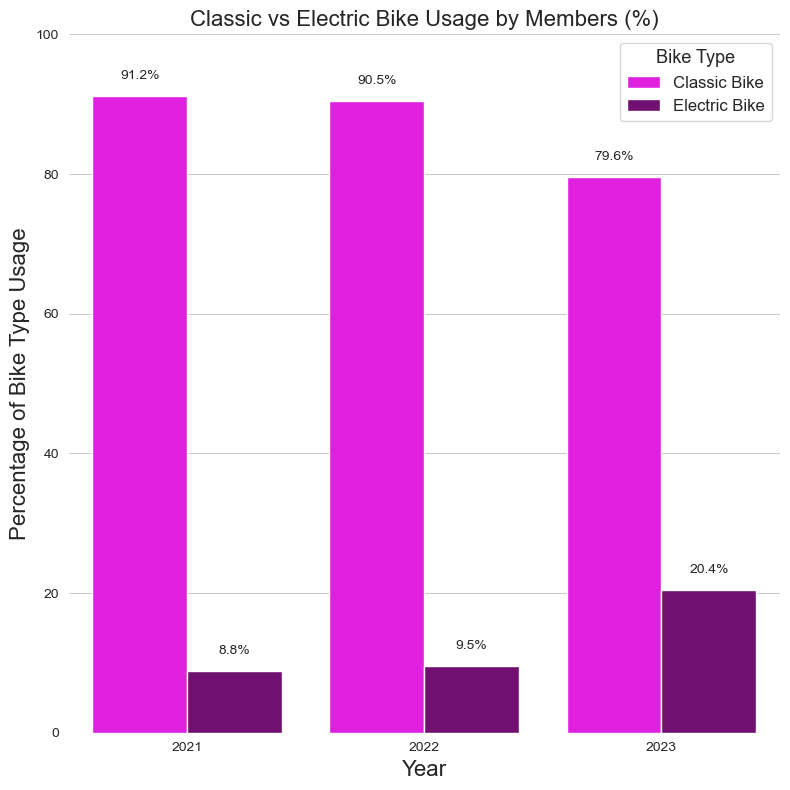

In [58]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is called combined_bike_data

# Clean any extra spaces in the 'start_ward' column
combined_bike_data['start_ward'] = combined_bike_data['start_ward'].str.strip()

# Filter the data to include only members from Ward 7 and Ward 8, and create a combined category
combined_bike_data_filtered = combined_bike_data[(combined_bike_data['start_ward'].isin(['Ward 7', 'Ward 8'])) & 
                                                 (combined_bike_data['member_casual'] == 'member')]

# Add a new column to combine Ward 7 and Ward 8 into one category
combined_bike_data_filtered['ward_combined'] = 'Ward 7 & 8'

# Extract the year from 'started_at'
combined_bike_data_filtered['year'] = combined_bike_data_filtered['started_at'].dt.year

# Group by 'year', 'ward_combined', and 'rideable_type', and count the occurrences of each combination
grouped_data = combined_bike_data_filtered.groupby(['year', 'ward_combined', 'rideable_type']).size().reset_index(name='count')

# Pivot the data to get the counts of each bike type (classic vs electric) in separate columns
pivot_data = grouped_data.pivot_table(index=['year', 'ward_combined'], columns='rideable_type', values='count', aggfunc='sum', fill_value=0)

# Calculate the percentage for each bike type (electric and classic) within each year
pivot_data['total'] = pivot_data.sum(axis=1)
pivot_data['electric_bike_percentage'] = (pivot_data['electric_bike'] / pivot_data['total']) * 100
pivot_data['classic_bike_percentage'] = (pivot_data['classic_bike'] / pivot_data['total']) * 100

# Reset the index to make it easier to plot
pivot_data = pivot_data.reset_index()

# Melt the dataframe to get it in a long format suitable for seaborn
pivot_data_melted = pivot_data.melt(id_vars=['year', 'ward_combined'], value_vars=['electric_bike_percentage', 'classic_bike_percentage'],
                                    var_name='bike_type', value_name='percentage')

# Create the figure and axis
plt.figure(figsize=(8, 8))

# Create the bar plot to show the percentage of bike types (classic vs electric) for each year
ax = sns.barplot(data=pivot_data_melted, x='year', y='percentage', hue='bike_type', ci=None, 
                 palette={'electric_bike_percentage': 'purple', 'classic_bike_percentage': 'magenta'}, 
                 dodge=True, hue_order=['classic_bike_percentage', 'electric_bike_percentage'])

# Add labels and title
plt.title('Classic vs Electric Bike Usage by Members (%)', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Percentage of Bike Type Usage', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Customize the legend
plt.legend(title='Bike Type', labels=['Classic Bike', 'Electric Bike'], loc='upper right', fontsize=12, title_fontsize=13)

# Remove all outer spines (top, right, left, and bottom)
sns.despine(left=True, bottom=True, top=True, right=True)

# Set the y-axis limit to 0 to 100 for percentage, and explicitly remove 0% at the bottom
plt.ylim(0, 100)

# Add percentage labels to each bar
for p in ax.patches:
    # Get the height of each bar (percentage)
    height = p.get_height()
    # Only add labels for bars where height is greater than 0
    if height > 0:
        # Add a label with the height (percentage) at the bar's x and y positions
        ax.text(p.get_x() + p.get_width() / 2, height + 2, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()



In [59]:
import pandas as pd

df = pd.DataFrame(combined_bike_data)

# Step 1: Convert the 'ended_at' column to datetime
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Step 2: Extract the year from 'ended_at'
df['year'] = df['ended_at'].dt.year

# Step 3: Count the unique start and end stations per year
unique_start_stations = df.groupby('year')['start_station_id'].nunique()
unique_end_stations = df.groupby('year')['end_station_id'].nunique()

# Step 4: Combine the results
station_counts = pd.DataFrame({
    'unique_start_stations': unique_start_stations,
    'unique_end_stations': unique_end_stations
}).fillna(0)

# Step 5: Calculate the total unique stations (considering both start and end stations)
station_counts['total_unique_stations'] = station_counts['unique_start_stations'] + station_counts['unique_end_stations']

# Step 6: Show the result
print(station_counts)


      unique_start_stations  unique_end_stations  total_unique_stations
year                                                                   
2021                    338                  344                    682
2022                    357                  357                    714
2023                    405                  382                    787
2024                     15                   15                     30


C:\Users\janin\AppData\Local\Temp\ipykernel_20280\3913385898.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  members_data['ride_duration'] = (members_data['ended_at'] - members_data['started_at']).dt.total_seconds() / 60  # Duration in minutes
C:\Users\janin\AppData\Local\Temp\ipykernel_20280\3913385898.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  members_data['year'] = members_data['started_at'].dt.year


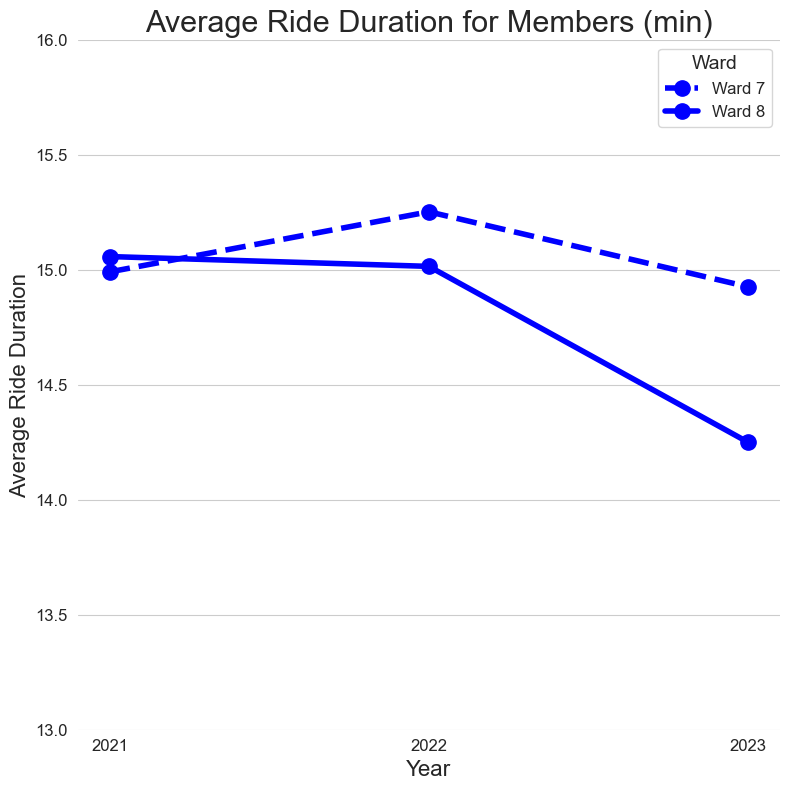

In [60]:
import pandas as pd 
import matplotlib.pyplot as plt

# Convert 'started_at' and 'ended_at' to datetime
combined_bike_data['started_at'] = pd.to_datetime(combined_bike_data['started_at'])
combined_bike_data['ended_at'] = pd.to_datetime(combined_bike_data['ended_at'])

# Filter for members only
members_data = combined_bike_data[combined_bike_data['member_casual'] == 'member']

# Calculate ride duration (in minutes)
members_data['ride_duration'] = (members_data['ended_at'] - members_data['started_at']).dt.total_seconds() / 60  # Duration in minutes

# Extract year from 'started_at' and create a new column 'year'
members_data['year'] = members_data['started_at'].dt.year

# Group by 'start_ward', 'year', and calculate average ride duration for members
average_duration_per_year = members_data.groupby(['start_ward', 'year'])['ride_duration'].mean().reset_index()

# Pivot the DataFrame to have years as columns
average_duration_pivot = average_duration_per_year.pivot(index='start_ward', columns='year', values='ride_duration')

# Filter to show only Wards 7 and 8
average_duration_pivot = average_duration_pivot.loc[['Ward 7', 'Ward 8']]

# Create the line plot
plt.figure(figsize=(8, 8))  # Adjusted figure size for better visibility

# Plot data for Ward 7 and Ward 8 with adjusted line width and marker size
plt.plot(average_duration_pivot.columns, average_duration_pivot.loc['Ward 7'], 
         marker='o', linestyle='--', color='blue', label='Ward 7', 
         linewidth=4, markersize=11)  # Adjust line width and marker size for Ward 7
plt.plot(average_duration_pivot.columns, average_duration_pivot.loc['Ward 8'], 
         marker='o', linestyle='-', color='blue', label='Ward 8', 
         linewidth=4, markersize=11)  # Adjust line width and marker size for Ward 8

# Add labels and title with larger font size
plt.xlabel('Year', fontsize=16)  # x-axis label font size
plt.ylabel('Average Ride Duration', fontsize=16)  # y-axis label font size
plt.title('Average Ride Duration for Members (min)', fontsize=22)  # Title font size

# Set x-ticks to full years and rotate for readability, with font size adjustment
plt.xticks(ticks=average_duration_pivot.columns, labels=average_duration_pivot.columns, rotation=0, fontsize=12)

# Set y-ticks font size (if needed) and adjust y-axis limits
plt.yticks(fontsize=12)
plt.ylim(13, 16)  # Adjust y-axis limits based on max value for better visualization

# Customize grid lines to show only horizontal grid lines
plt.grid(axis='x')  # Display only horizontal grid lines
plt.gca().spines['top'].set_visible(False)  # Remove top outline
plt.gca().spines['right'].set_visible(False)  # Remove right outline
plt.gca().spines['left'].set_visible(False)  # Remove left outline
plt.gca().spines['bottom'].set_visible(False)  # Remove bottom outline

# Add legend with larger font size for title and label
plt.legend(title='Ward', fontsize=12, title_fontsize=14)

# Adjust layout to make room for labels and prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


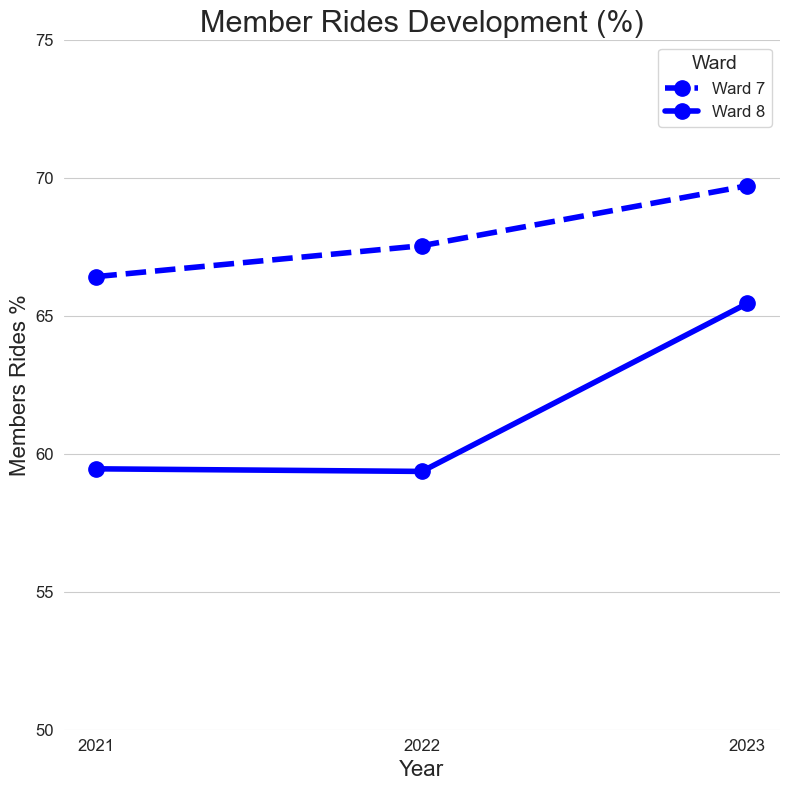

In [61]:
import pandas as pd 
import matplotlib.pyplot as plt

# Convert 'started_at' to datetime
combined_bike_data['started_at'] = pd.to_datetime(combined_bike_data['started_at'])

# Extract year from 'started_at' and create a new column 'year'
combined_bike_data['year'] = combined_bike_data['started_at'].dt.year

# Group by 'start_ward', 'year', and 'member_casual' to get counts
user_counts = combined_bike_data.groupby(['start_ward', 'year', 'member_casual']).size().unstack(fill_value=0)

# Create a new DataFrame to hold member and casual counts
member_counts = user_counts[['member', 'casual']].reset_index()

# Group by year and ward, summing member and casual counts
accumulated_counts = member_counts.groupby(['year', 'start_ward']).sum().reset_index()

# Calculate total rides (members + casual) for percentage calculation
accumulated_counts['total'] = accumulated_counts['member'] + accumulated_counts['casual']

# Calculate the percentage of members relative to total rides
accumulated_counts['percentage'] = (accumulated_counts['member'] / accumulated_counts['total']) * 100

# Pivot the DataFrame to have years as columns
percentage_counts = accumulated_counts.pivot(index='start_ward', columns='year', values='percentage')

# Filter to show only Wards 7 and 8
percentage_counts = percentage_counts.loc[['Ward 7', 'Ward 8']]

# Create the line plot
plt.figure(figsize=(8, 8))  # Adjusted figure size for better visibility

# Plot data for Ward 7 and Ward 8 with adjusted line width and marker size
plt.plot(percentage_counts.columns, percentage_counts.loc['Ward 7'], 
         marker='o', linestyle='--', color='blue', label='Ward 7', 
         linewidth=4, markersize=11)  # Adjust line width and marker size for Ward 7
plt.plot(percentage_counts.columns, percentage_counts.loc['Ward 8'], 
         marker='o', linestyle='-', color='blue', label='Ward 8', 
         linewidth=4, markersize=11)  # Adjust line width and marker size for Ward 8

# Add labels and title with larger font size
plt.xlabel('Year', fontsize=16)  # x-axis label font size
plt.ylabel('Members Rides %', fontsize=16)  # y-axis label font size
plt.title('Member Rides Development (%)', fontsize=22)  # Title font size

# Set x-ticks to full years and rotate for readability, with font size adjustment
plt.xticks(ticks=percentage_counts.columns, labels=percentage_counts.columns, rotation=0, fontsize=12)

# Set y-ticks font size (if needed) and adjust y-axis limits
plt.yticks(fontsize=12)
plt.ylim(50, 75)  # Set y-axis limits to 50-80% (or adjust based on your data)

# Customize grid lines to show only horizontal grid lines
plt.grid(axis='x')  # Display only horizontal grid lines (grid lines along the y-axis)
plt.gca().spines['top'].set_visible(False)  # Remove top outline
plt.gca().spines['right'].set_visible(False)  # Remove right outline
plt.gca().spines['left'].set_visible(False)  # Remove left outline
plt.gca().spines['bottom'].set_visible(False)  # Remove bottom outline

# Add legend with larger font size for title and label
plt.legend(title='Ward', fontsize=12, title_fontsize=14)

# Adjust layout to make room for labels and prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### EDA Weather

In [62]:
df_weather_all = pd.read_csv(r'C:\Users\janin\OneDrive\Desktop\Python exercise\Project 3\CBS_2021-2023_Daily_Weather.csv')

In [63]:
df_weather_all['Date'] = pd.to_datetime(df_weather_all['Date'])


df_weather_2021 = df_weather_all[df_weather_all['Date'].dt.year == 2021]

df_weather_2022 = df_weather_all[df_weather_all['Date'].dt.year == 2022]

df_weather_2023 = df_weather_all[df_weather_all['Date'].dt.year == 2023]

In [64]:
df_weather_all.shape

(1095, 8)

In [65]:
df_weather_all.columns

Index(['Casual', 'Date', 'Member', 'Total_rides',
       'apparent_temperature_mean (°C)', 'temperature_2m_mean (°C)',
       'weathercode (wmo code)', 'windspeed_10m_max (km/h)'],
      dtype='object')

In [66]:
unique_weather_codes = df_weather_all['weathercode (wmo code)'].unique()

print("Number of unique weather codes:", len(unique_weather_codes))

Number of unique weather codes: 13


In [67]:
print("Unique weather codes:", unique_weather_codes)

Unique weather codes: [63 61  3 51  2  1  0 53 73 71 75 55 65]


In [69]:
# Function to categorize weather codes
def categorize_weather_code(code):
    if code == 0:
        return 'clear'
    elif 1 <= code <= 3:
        return 'cloudy'
    elif 51 <= code <= 55:
        return 'drizzle'
    elif 61 <= code <= 65:
        return 'rain'
    elif 71 <= code <= 75:
        return 'snow'
    else:
        return 'unknown'  # For any code that doesn't match the given categories

# Apply the function to create the new column
df_weather_all['weather_condition'] = df_weather_all['weathercode (wmo code)'].apply(categorize_weather_code)

# This will print the first few rows of the DataFrame to verify the new column
df_weather_all.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),weather_condition
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,rain
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,rain
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,rain
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,cloudy
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,drizzle


In [70]:
# Function to categorize weather codes
def categorize_weather_code(code):
    if code == 0:
        return 'clear'
    elif 1 <= code <= 3:
        return 'cloudy'
    elif 51 <= code <= 55:
        return 'drizzle'
    elif 61 <= code <= 65:
        return 'rain'
    elif 71 <= code <= 75:
        return 'snow'
    else:
        return 'unknown'  # For any code that doesn't match the given categories

# Apply the function to create the new column
df_weather_2023['weather_condition'] = df_weather_2023['weathercode (wmo code)'].apply(categorize_weather_code)

C:\Users\janin\AppData\Local\Temp\ipykernel_20280\63805405.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather_2023['weather_condition'] = df_weather_2023['weathercode (wmo code)'].apply(categorize_weather_code)


In [71]:
df_weather_2023.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),weather_condition
730,3573,2023-01-01,3214,6787,8.4,10.5,1,14.7,cloudy
731,3433,2023-01-02,3807,7240,9.1,10.7,2,11.3,cloudy
732,2635,2023-01-03,4924,7559,13.1,14.2,53,20.3,drizzle
733,2488,2023-01-04,5303,7791,15.8,16.0,55,21.0,drizzle
734,2954,2023-01-05,5455,8409,11.4,12.6,51,13.0,drizzle


C:\Users\janin\AppData\Local\Temp\ipykernel_20280\426984329.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather_condition', y='Total_rides', data=df_weather_all, order=order, palette=colors,
C:\Users\janin\AppData\Local\Temp\ipykernel_20280\426984329.py:19: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='weather_condition', y='Total_rides', data=df_weather_all, order=order, palette=colors,


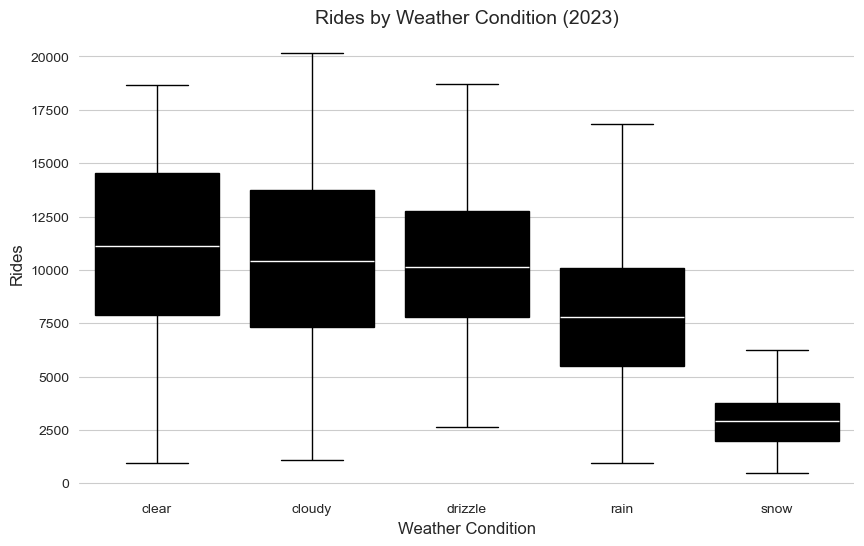

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_weather_all is your DataFrame

# Calculate median Total_rides for each weather_condition
median_total_rides = df_weather_all.groupby('weather_condition')['Total_rides'].median().sort_values(ascending=False)

# Get the weather_condition in descending order of their median Total_rides
order = median_total_rides.index

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Define the palette for the box plot (using only black)
colors = ['black']

# Create the box plot with ordered weather_condition categories and custom palette
sns.boxplot(x='weather_condition', y='Total_rides', data=df_weather_all, order=order, palette=colors, 
            fliersize=0, showmeans=True, meanline=True, meanprops={'color': 'white', 'lw': 1, 'ls': '-'})  # Mean line is white

# Remove all spines (borders) for a cleaner look
sns.despine(left=True, bottom=True, right=True, top=True)

# Set the title and labels of the plot
plt.title('Rides by Weather Condition (2023)', fontsize=14)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Rides', fontsize=12)

# Display the plot
plt.show()




In [104]:
# Check the first few rows of the relevant columns
df_weather_2021[['Date', 'temperature_2m_mean (°C)']].head()


,Date,temperature_2m_mean (°C)
0,2021-01-01,2.3
1,2021-01-02,7.6
2,2021-01-03,3.9
3,2021-01-04,4.1
4,2021-01-05,4.0


In [107]:
# Create a 'YearMonth' column by extracting the year and month from the 'Date' column
df_weather_2021['YearMonth'] = df_weather_2021['Date'].dt.to_period('M')

# Check the first few rows of the dataframe to confirm the 'YearMonth' column is created
print(df_weather_2021[['Date', 'YearMonth']].head())

# Perform aggregation by 'YearMonth'
monthly_data = df_weather_2021.groupby('YearMonth').agg(
    total_rides=('Total_rides', 'sum'),
    avg_temperature=('temperature_2m_mean (°C)', 'mean')
).reset_index()

# Check the first few rows of the aggregated monthly data
print(monthly_data.head())


        Date YearMonth
0 2021-01-01   2021-01
1 2021-01-02   2021-01
2 2021-01-03   2021-01
3 2021-01-04   2021-01
4 2021-01-05   2021-01
  YearMonth  total_rides  avg_temperature
0   2021-01       100070         2.122581
1   2021-02        77505         1.578571
2   2021-03       171165         9.038710
3   2021-04       216763        13.223333
4   2021-05       254177        17.883871


C:\Users\janin\AppData\Local\Temp\ipykernel_20280\1215786898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather_2021['YearMonth'] = df_weather_2021['Date'].dt.to_period('M')


In [108]:
# Check the aggregation of the monthly data
monthly_data = df_weather_2021.groupby('YearMonth').agg(
    total_rides=('Total_rides', 'sum'),
    avg_temperature=('temperature_2m_mean (°C)', 'mean')
).reset_index()

# Check the first few rows of the monthly aggregated data
monthly_data.head()


,YearMonth,total_rides,avg_temperature
0,2021-01,100070,2.122581
1,2021-02,77505,1.578571
2,2021-03,171165,9.038710
3,2021-04,216763,13.223333
4,2021-05,254177,17.883871


C:\Users\janin\AppData\Local\Temp\ipykernel_20280\991084298.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather_2021['Date'] = pd.to_datetime(df_weather_2021['Date'])
C:\Users\janin\AppData\Local\Temp\ipykernel_20280\991084298.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_temperature = daily_temperature.set_index('Date').resample('M').mean().reset_index()


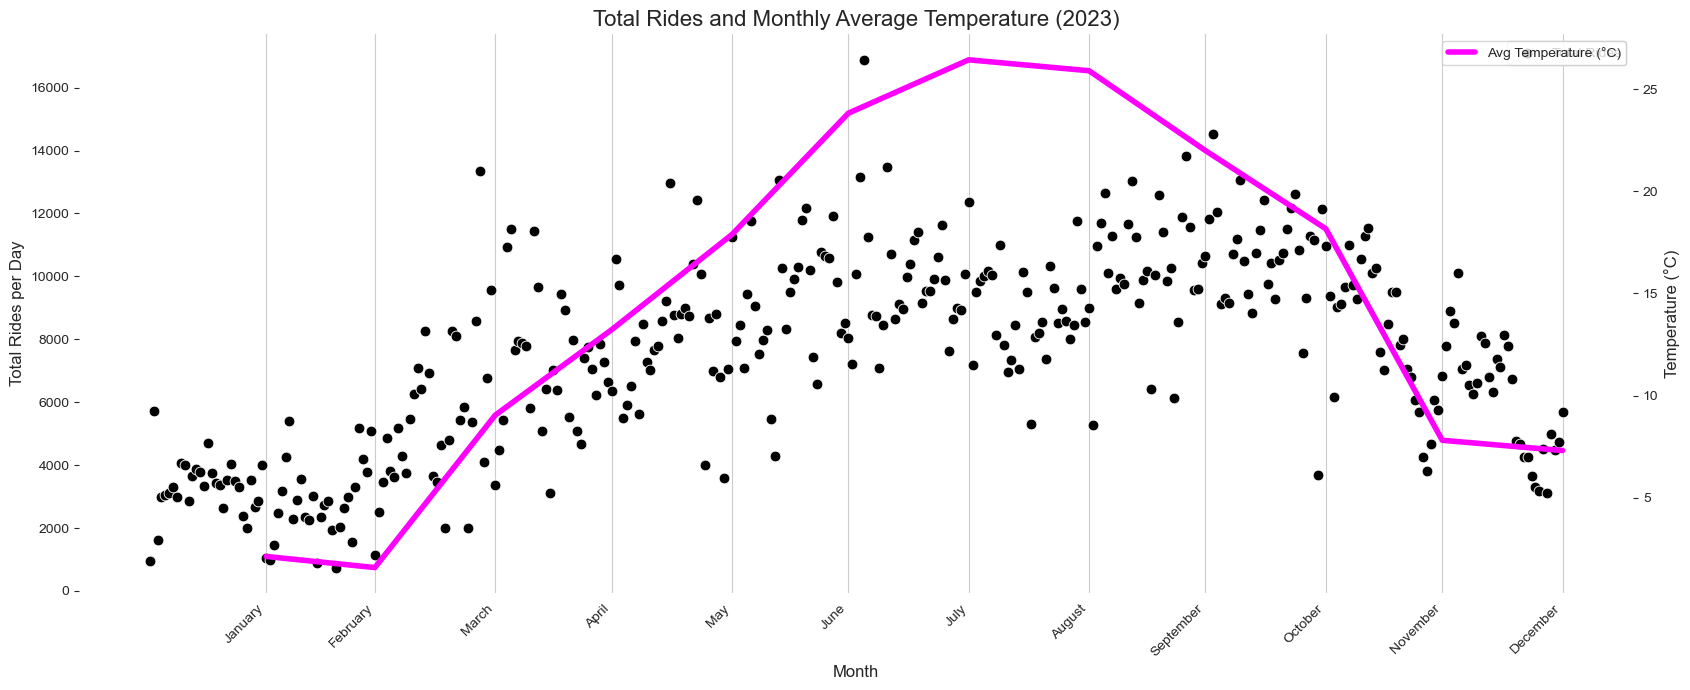

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'Date' column is in datetime format
df_weather_2021['Date'] = pd.to_datetime(df_weather_2021['Date'])

# Group the data by Date to calculate the daily total rides and daily average temperature
daily_rides = df_weather_2021.groupby('Date').agg(total_rides=('Total_rides', 'sum')).reset_index()
daily_temperature = df_weather_2021.groupby('Date').agg(avg_temperature=('temperature_2m_mean (°C)', 'mean')).reset_index()

# Resample the daily temperature to monthly average
daily_temperature['Date'] = pd.to_datetime(daily_temperature['Date'])
monthly_temperature = daily_temperature.set_index('Date').resample('M').mean().reset_index()

# Extract month names for the x-axis labels
monthly_temperature['Month'] = monthly_temperature['Date'].dt.strftime('%B')

# Set up the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(17, 7))

# Plot total rides on the first y-axis (black dots), with increased marker edge width
sns.scatterplot(x=daily_rides['Date'], y=daily_rides['total_rides'], color='black', label='Total Rides', ax=ax1, s=60)

# Create a second y-axis for temperature
ax2 = ax1.twinx()

# Plot smoothed monthly average temperature on the second y-axis (magenta line), with increased line width
sns.lineplot(x=monthly_temperature['Date'], y=monthly_temperature['avg_temperature'], color='magenta', label='Avg Temperature (°C)', ax=ax2, linewidth=4)

# Add titles, labels, and formatting
ax1.set_title('Total Rides and Monthly Average Temperature (2023)', fontsize=16)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Total Rides per Day', fontsize=12)
ax2.set_ylabel('Temperature (°C)', fontsize=12)

# Rotate x-axis labels for better readability
ax1.set_xticks(monthly_temperature['Date'])
ax1.set_xticklabels(monthly_temperature['Month'], rotation=45, ha='right')

# Clean up the plot:
sns.despine(left=True, bottom=True, right=True)  # Remove outer borders on the left, bottom, and right

# Remove horizontal gridlines from both axes, but keep vertical gridlines
ax1.grid(True, axis='x')  # Keep vertical gridlines for rides axis
ax2.grid(True, axis='x')  # Keep vertical gridlines for temperature axis

# Set horizontal gridlines to False explicitly
ax1.yaxis.grid(False)  # Disable horizontal gridlines for rides axis
ax2.yaxis.grid(False)  # Disable horizontal gridlines for temperature axis

# Display the plot
plt.tight_layout()
plt.show()
